In [3]:
from DipoleGroundState import MonoclinicLattice
import numpy as np
import scipy.sparse
import time
import random
import spinh 
import matplotlib.pyplot as plt

pi = np.pi
mB=9.274*10**(-24)
k=1.380*10**(-23)
NA=6.022*10**23
mu0=4*pi*10**(-7)
ErCl3 = MonoclinicLattice()
ErCl3.axes(9.57, 6.47, 7.84, 93.65*np.pi/180)
ErCl3.g_tensor(13.74, 0.75, 257*np.pi/180)
ErCl3.ion1_position(0.25, 0.1521, 0.25)
ErCl3.ion2_position(0.75, 0.8479, 0.75)

A_positions, A_labels = ErCl3.spherical_bravais_lattice(150,1,'A',1,'A')
B_positions, B_labels = ErCl3.spherical_bravais_lattice(150,1,'A',1,'B')
vertices = np.concatenate((A_positions,B_positions),axis=0)
ion_vector = ErCl3.position['1A']

factor = (mu0)/(4*pi)/((10**(-10))**3)
rx = vertices[:,0] - ion_vector[0]
ry = vertices[:,1] - ion_vector[1]
rz = vertices[:,2] - ion_vector[2]
rtot = np.sqrt(np.sum(np.power(vertices - ion_vector,2),axis=1))
mux = 0
muy = 0
muz = 0.5*mB*ErCl3.gz

Bx_each_ion = factor*((3*(muz*rz)*rx)/(rtot**5))
By_each_ion = factor*((3*(muz*rz)*ry)/(rtot**5))
Bz_each_ion = factor*(-(muz/rtot**3) + (3*(muz*rz)*rz)/(rtot**5))




import numpy as np
import spinh

#Applied a universal rotation to my zeeman tensors calculated from the spiral
#As a result the direction of maximam splitting is now along the z axis
#Now it's in the same coordinate frame as everything above
#Note that this hamiltonian doesn't have 
# an axial tensor, so it's not completely consistent

alpha_gnd =   0.0*np.pi/180
beta_gnd  = -90.0*np.pi/180
gamma_gnd =-167.571*np.pi/180
gx_gnd    =  13.1
gy_gnd    =   0.0
gz_gnd    =   0.55
alpha_exc =   7.924*np.pi/180
beta_exc  = -92.722*np.pi/180
gamma_exc =-168.467*np.pi/180
gx_exc    =  13.0
gy_exc    =   0.8
gz_exc    =   0.9
rho = 2/(np.dot(np.cross(ErCl3.a,ErCl3.b),ErCl3.c))/((10**(-10))**3)
M_gnd = spinh.M(alpha_gnd, beta_gnd, gamma_gnd, gx_gnd, gy_gnd, gz_gnd)
M_exc = spinh.M(alpha_exc, beta_exc, gamma_exc, gx_exc, gy_exc, gz_exc)

In [2]:


def plot_fields(distributions):
    f, (ax1, ax2, ax3) = plt.subplots(1,3)
    for dist in distributions:
        ax1.hist(dist[:,0]*1,50,range=(-0.2,0.2))
        ax1.set_xlabel("$B_x$ at site (T)")
        ax2.hist(dist[:,1]*1,50,range=(-0.2,0.2))
        ax2.set_xlabel("$B_y$ at site (T)")
        ax3.hist(dist[:,2]*1,50,range=(-0.2,0.2))
        ax3.set_xlabel("$B_z$ at site (T)")
    plt.legend()
    plt.show()



I've did some field calculations at different probabilities, and discovered that when the probability of a flip is less than 0.05, the field distribution is non-gaussian. There are other distinct modes either side of the main peak.

In [4]:
sample_length = 50000
distribution1 = field_samples(4.2,0,0,0,sample_length)
# distribution2 = field_samples(0.26,0,0,0.107,sample_length)
# distribution3 = field_samples(2,0,0,0.2,sample_length)

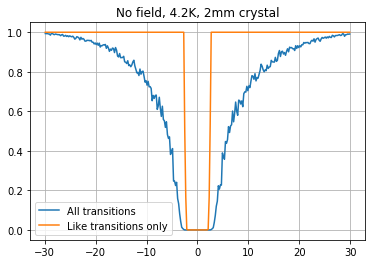

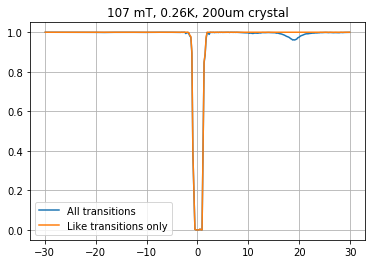

In [51]:
import importlib
importlib.reload(spinh)

f, ax = spinh.synthetic_spectrum(M_gnd,M_exc,4.2,0,0,0,20000,Bx_each_ion,By_each_ion,Bz_each_ion,vertices)
ax.set_title("No field, 4.2K, 2mm crystal")
plt.show()
f, ax = spinh.synthetic_spectrum(M_gnd,M_exc,0.26,0,0,0.107,20000,Bx_each_ion,By_each_ion,Bz_each_ion,vertices,length=2e-4)
ax.set_title("107 mT, 0.26K, 200um crystal")
plt.show()

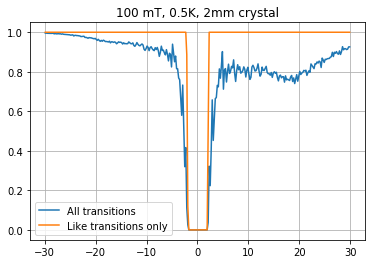

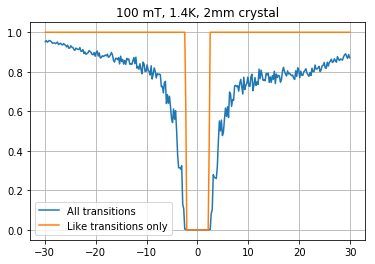

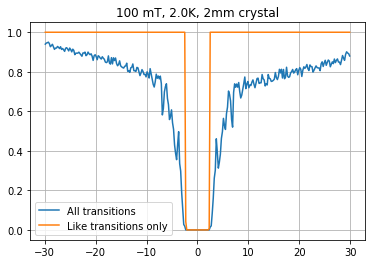

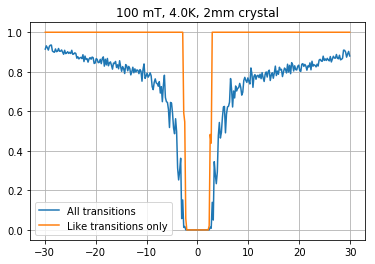

In [52]:
f, ax = spinh.synthetic_spectrum(M_gnd,M_exc,0.5,0,0,0.1,20000,Bx_each_ion,By_each_ion,Bz_each_ion,vertices)
ax.set_title("100 mT, 0.5K, 2mm crystal")
plt.show()
# f, ax = spinh.synthetic_spectrum(M_gnd,M_exc,0.8,0,0,0.1,20000,Bx_each_ion,By_each_ion,Bz_each_ion,vertices)
# ax.set_title("100 mT, 0.8K, 2mm crystal")
# plt.show()
f, ax = spinh.synthetic_spectrum(M_gnd,M_exc,1.4,0,0,0.1,20000,Bx_each_ion,By_each_ion,Bz_each_ion,vertices)
ax.set_title("100 mT, 1.4K, 2mm crystal")
plt.show()
f, ax = spinh.synthetic_spectrum(M_gnd,M_exc,2.0,0,0,0.1,20000,Bx_each_ion,By_each_ion,Bz_each_ion,vertices)
ax.set_title("100 mT, 2.0K, 2mm crystal")
plt.show()
f, ax = spinh.synthetic_spectrum(M_gnd,M_exc,4.0,0,0,0.1,20000,Bx_each_ion,By_each_ion,Bz_each_ion,vertices)
ax.set_title("100 mT, 4.0K, 2mm crystal")
plt.show()

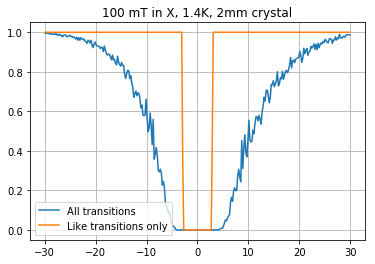

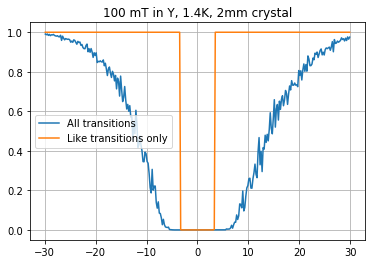

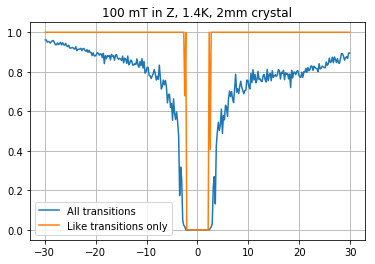

In [53]:
f, ax = spinh.synthetic_spectrum(M_gnd,M_exc,1.4,0.1,0,0,20000,Bx_each_ion,By_each_ion,Bz_each_ion,vertices)
ax.set_title("100 mT in X, 1.4K, 2mm crystal")
plt.show()
f, ax = spinh.synthetic_spectrum(M_gnd,M_exc,1.4,0,0.1,0,20000,Bx_each_ion,By_each_ion,Bz_each_ion,vertices)
ax.set_title("100 mT in Y, 1.4K, 2mm crystal")
plt.show()
f, ax = spinh.synthetic_spectrum(M_gnd,M_exc,1.4,0,0,0.1,20000,Bx_each_ion,By_each_ion,Bz_each_ion,vertices)
ax.set_title("100 mT in Z, 1.4K, 2mm crystal")
plt.show()

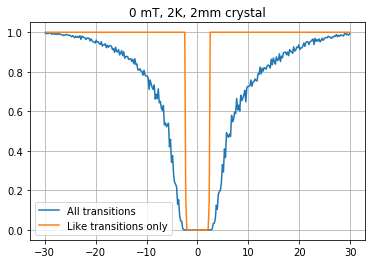

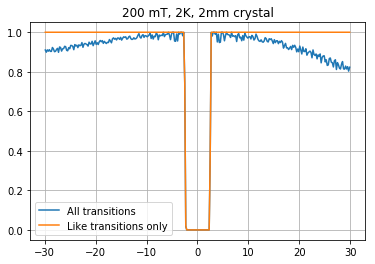

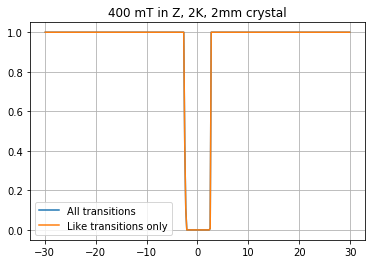

In [55]:
f, ax = spinh.synthetic_spectrum(M_gnd,M_exc,2,0,0,0.0,20000,Bx_each_ion,By_each_ion,Bz_each_ion,vertices)
ax.set_title("0 mT, 2K, 2mm crystal")
plt.show()
f, ax = spinh.synthetic_spectrum(M_gnd,M_exc,2.0,0,0,0.2,20000,Bx_each_ion,By_each_ion,Bz_each_ion,vertices)
ax.set_title("200 mT, 2K, 2mm crystal")
plt.show()
f, ax = spinh.synthetic_spectrum(M_gnd,M_exc,2.0,0,0,0.4,20000,Bx_each_ion,By_each_ion,Bz_each_ion,vertices)
ax.set_title("400 mT in Z, 2K, 2mm crystal")
plt.show()

Algorithm:
Specify some T
Set B0 for first iteration
Calculate M from given B0 and T

Caculate field at 500 lattice points using B, T and M
Calculate the average B field
Repeat using most recent B field and it's corresponding M

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9
1.0


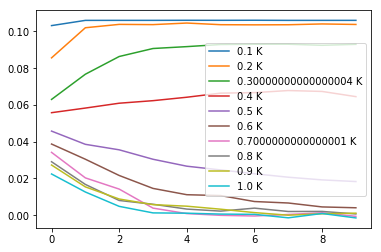

In [62]:
rho = 2/(np.dot(np.cross(ErCl3.a,ErCl3.b),ErCl3.c))/((10**(-10))**3)

for T in np.linspace(0.1,1,10):
    t = time.time()
    B = [0,0,0.05]
    M = rho*np.array([mux,muy,muz])*(1-2*probabilty_flipped(T,*B))
    B_list = []
    M_list = []
    for i in range(10):
        Bcavity = mu0*M/3
        field_list = []
        for j in range(2000):
            field_list.append(spinh.field(M_gnd,Bx_each_ion,By_each_ion,Bz_each_ion,vertices,T,*B) + Bcavity-B)
        B = np.mean(field_list,axis=0)
        M = rho*np.array([mux,muy,muz])*(1-2*probabilty_flipped(T,*B))
        B_list.append(B[2])
        M_list.append(M[2])
    print(T)
    plt.plot(B_list[:],label=str(T)+' K')
plt.legend()

<Container object of 3 artists>

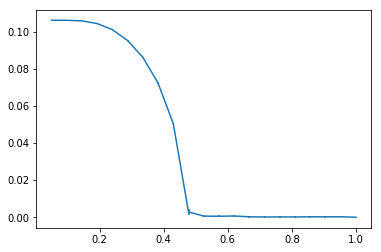

In [54]:
temperature = [0.05,0.0975,0.145,0.1925,0.24,0.2875,0.335,0.3825,0.43,0.4775,0.525,0.5725,0.62,0.6675,0.715,0.7625,0.81,0.8575,0.905,0.9525,1]
field = [0.106071674801177,0.106058245418875,0.105728503901115,0.104283953115491,0.101006776141401,0.095119098584749,0.086114970225216,0.072229523708224,0.050399443756945,0.00286040816993,0.000615261482484,0.000523168517267,0.000670531338031,0.000230630761336,0.000138208419002,0.000181735635927,0.000151933327205,0.000244614586531,0.000229007379266,0.000251176551483,8.95162581595006E-06]
field_error = [5.31538017602764E-09,6.50472008268503E-06,3.77417483128757E-05,7.15294917950143E-05,0.000128528117336,0.000207413316125,0.000252400218918,0.000459712371193,0.000368014820305,0.001520211901867,0.000590462051336,0.000624693669122,0.000683250022739,0.000449734909754,0.000397672538947,0.000453486182829,0.000490234289731,0.000569616383112,0.000521810306756,0.000376941833195,0.000375398744945]
plt.errorbar(temperature,field,yerr=field_error)